In [1]:
(require '[clojupyter.misc.helper :as helper])
(helper/add-dependencies '[incanter "1.5.7"])
(use '(incanter core stats charts io datasets ))

nil

In [2]:
(require '[cemerick.pomegranate :refer [add-dependencies]])
(add-dependencies :coordinates '[[org.clojure/data.csv "0.1.2"]])
(require '[clojure.data.csv :as csv])

nil

In [3]:
(def games (drop 1 (with-open [in-file (clojure.java.io/reader "games.csv")]
    (doall
         (csv/read-csv in-file)
    )
)))

(defrecord Game [game jp_sales global_sales])

(defn toInt [n] (Integer. n))
(defn toDouble [n] (Double. n))
(defn square [n] (* n n))
(defn avg [items] (/ (reduce + items) (count items)))
(defn error [aprox real] (* (/ (abs (- aprox real)) real) 100))

(defn gameToRecord [g] 
    (Game. 
         (nth g 0) 
         (toDouble (if (empty? (nth g 7)) "0" (nth g 7)))
         (toDouble (if (empty? (nth g 9)) "0" (nth g 9))) 
    )
)

(def data (map #(gameToRecord %) games))

(ns-unmap (find-ns 'user) 'games)

(def shuffledData (shuffle data))
(def trainingData (take (int (* (count data) 0.8)) shuffledData))
(def testData (take-last (int (* (count data) 0.2)) shuffledData))

(ns-unmap (find-ns 'user) 'data)
(ns-unmap (find-ns 'user) 'shuffledData)

nil

In [4]:
(def ventasJpn (map #(:jp_sales %) trainingData))
(def ventasGlobal (map #(:global_sales %) trainingData))

#'user/ventasGlobal

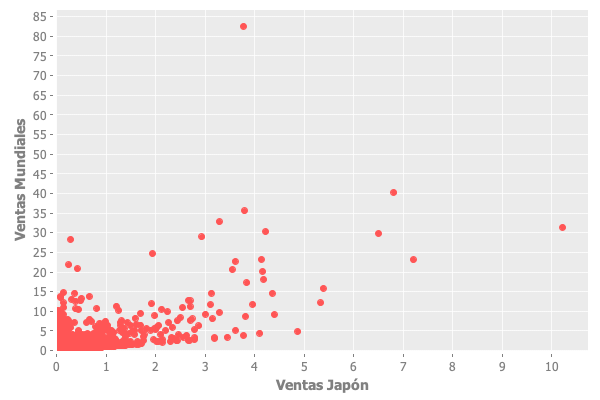

In [5]:
(-> (scatter-plot ventasJpn
                 ventasGlobal
                 :x-label "Ventas Japón" :y-label "Ventas Mundiales")
    (.createBufferedImage 600 400)
)

In [6]:
(def avgJpn (avg ventasJpn))
(def avgGlobal (avg ventasGlobal))

(def m 
    (/ 
        (reduce + (map #(* (- (:jp_sales %) avgJpn) (- (:global_sales %) avgGlobal)) trainingData))
        (reduce + (map #(square (- (:jp_sales %) avgGlobal)) trainingData))
    )
)
(def c (- avgGlobal (* avgJpn m)))

(defn eq [x] (+ (* x m) c) )


#'user/eq

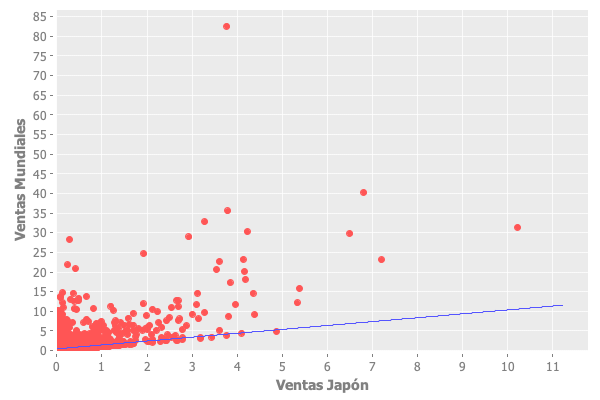

In [7]:
(-> (scatter-plot ventasJpn
                  ventasGlobal
                  :x-label "Ventas Japón" :y-label "Ventas Mundiales")
    (add-function eq 0 (+ (reduce max ventasJpn) 1))
    (.createBufferedImage 600 400)
)

In [8]:
;;Promedio de porcentaje de error en datos de prueba
(avg (map #(error (eq (:jp_sales %)) (:global_sales %)) testData))

639.59748684435